# Physical setup


In [1]:
import jetset
print('tested on jetset',jetset.__version__)

tested on jetset 1.2.0rc6


## Basic  setup

In [2]:
from jetset.jet_model import Jet
my_jet=Jet(name='test',electron_distribution='lppl',)

In [3]:
Jet.available_electron_distributions()

lp: log-parabola
pl: powerlaw
lppl: log-parabola with low-energy powerlaw branch
lpep: log-parabola defined by peak energy
plc: powerlaw with cut-off
bkn: broken powerlaw
superexp: powerlaw with super-exp cut-off


to view all the paramters:

In [4]:
my_jet.show_pars()

model name,name,par type,units,val,phys. bound. min,phys. bound. max,log,frozen
test,R,region_size,cm,5.000000e+15,1.000000e+03,1.000000e+30,False,False
test,R_H,region_position,cm,1.000000e+17,0.000000e+00,--,False,True
test,B,magnetic_field,gauss,1.000000e-01,0.000000e+00,--,False,False
test,beam_obj,beaming,lorentz-factor*,1.000000e+01,1.000000e-04,--,False,False
test,z_cosm,redshift,,1.000000e-01,0.000000e+00,--,False,False
test,gmin,low-energy-cut-off,lorentz-factor*,2.000000e+00,1.000000e+00,1.000000e+09,False,False
test,gmax,high-energy-cut-off,lorentz-factor*,1.000000e+06,1.000000e+00,1.000000e+15,False,False
test,N,emitters_density,1 / cm3,1.000000e+02,0.000000e+00,--,False,False
test,gamma0_log_parab,turn-over-energy,lorentz-factor*,1.000000e+04,1.000000e+00,1.000000e+09,False,False
test,s,LE_spectral_slope,,2.000000e+00,-1.000000e+01,1.000000e+01,False,False


In [5]:
my_jet.parameters

model name,name,par type,units,val,phys. bound. min,phys. bound. max,log,frozen
test,R,region_size,cm,5.000000e+15,1.000000e+03,1.000000e+30,False,False
test,R_H,region_position,cm,1.000000e+17,0.000000e+00,--,False,True
test,B,magnetic_field,gauss,1.000000e-01,0.000000e+00,--,False,False
test,beam_obj,beaming,lorentz-factor*,1.000000e+01,1.000000e-04,--,False,False
test,z_cosm,redshift,,1.000000e-01,0.000000e+00,--,False,False
test,gmin,low-energy-cut-off,lorentz-factor*,2.000000e+00,1.000000e+00,1.000000e+09,False,False
test,gmax,high-energy-cut-off,lorentz-factor*,1.000000e+06,1.000000e+00,1.000000e+15,False,False
test,N,emitters_density,1 / cm3,1.000000e+02,0.000000e+00,--,False,False
test,gamma0_log_parab,turn-over-energy,lorentz-factor*,1.000000e+04,1.000000e+00,1.000000e+09,False,False
test,s,LE_spectral_slope,,2.000000e+00,-1.000000e+01,1.000000e+01,False,False


None

and the corresponding  astropy table with units can be accessed by: `my_jet.parameters.par_table`

In [6]:
my_jet.show_model()


--------------------------------------------------------------------------------
jet model description
--------------------------------------------------------------------------------
name: test  

electrons distribution:
 type: lppl  
 gamma energy grid size:  201
 gmin grid : 2.000000e+00
 gmax grid : 1.000000e+06
 normalization  True
 log-values  False

radiative fields:
 seed photons grid size:  100
 IC emission grid size:  100
 source emissivity lower bound :  1.000000e-120
 spectral components:
   name:Sum, state: on
   name:Sync, state: self-abs
   name:SSC, state: on
external fields transformation method: blob

SED info:
 nu grid size jetkernel: 1000
 nu grid size: 500
 nu mix (Hz): 1.000000e+06
 nu max (Hz): 1.000000e+30

flux plot lower bound   :  1.000000e-120

--------------------------------------------------------------------------------


model name,name,par type,units,val,phys. bound. min,phys. bound. max,log,frozen
test,R,region_size,cm,5.000000e+15,1.000000e+03,1.000000e+30,False,False
test,R_H,region_position,cm,1.000000e+17,0.000000e+00,--,False,True
test,B,magnetic_field,gauss,1.000000e-01,0.000000e+00,--,False,False
test,beam_obj,beaming,lorentz-factor*,1.000000e+01,1.000000e-04,--,False,False
test,z_cosm,redshift,,1.000000e-01,0.000000e+00,--,False,False
test,gmin,low-energy-cut-off,lorentz-factor*,2.000000e+00,1.000000e+00,1.000000e+09,False,False
test,gmax,high-energy-cut-off,lorentz-factor*,1.000000e+06,1.000000e+00,1.000000e+15,False,False
test,N,emitters_density,1 / cm3,1.000000e+02,0.000000e+00,--,False,False
test,gamma0_log_parab,turn-over-energy,lorentz-factor*,1.000000e+04,1.000000e+00,1.000000e+09,False,False
test,s,LE_spectral_slope,,2.000000e+00,-1.000000e+01,1.000000e+01,False,False


--------------------------------------------------------------------------------


## Setting the parameters

In [7]:
my_jet.set_par('B',val=0.2)
my_jet.set_par('gamma0_log_parab',val=5E3)
my_jet.set_par('gmin',val=1E2)
my_jet.set_par('gmax',val=1E8)
my_jet.set_par('R',val=1E15)
my_jet.set_par('N',val=1E3)

In [8]:
my_jet.parameters.B.val=0.2
my_jet.parameters.r.val=0.4

## Investigating the electron distribution

In [9]:
my_jet.show_electron_distribution()

--------------------------------------------------------------------------------
electrons distribution:
 type: lppl  
 gamma energy grid size:  201
 gmin grid : 2.000000e+00
 gmax grid : 1.000000e+06
 normalization  True
 log-values  False



model name,name,par type,units,val,phys. bound. min,phys. bound. max,log,frozen
test,B,magnetic_field,gauss,2.000000e-01,0.000000e+00,--,False,False
test,N,emitters_density,1 / cm3,1.000000e+03,0.000000e+00,--,False,False
test,R,region_size,cm,1.000000e+15,1.000000e+03,1.000000e+30,False,False
test,R_H,region_position,cm,1.000000e+17,0.000000e+00,--,False,True
test,beam_obj,beaming,lorentz-factor*,1.000000e+01,1.000000e-04,--,False,False
test,gamma0_log_parab,turn-over-energy,lorentz-factor*,5.000000e+03,1.000000e+00,1.000000e+09,False,False
test,gmax,high-energy-cut-off,lorentz-factor*,1.000000e+08,1.000000e+00,1.000000e+15,False,False
test,gmin,low-energy-cut-off,lorentz-factor*,1.000000e+02,1.000000e+00,1.000000e+09,False,False
test,r,spectral_curvature,,4.000000e-01,-1.500000e+01,1.500000e+01,False,False
test,s,LE_spectral_slope,,2.000000e+00,-1.000000e+01,1.000000e+01,False,False


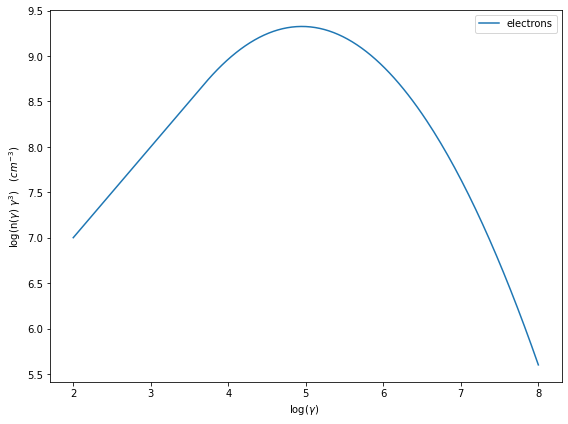

In [10]:
p=my_jet.electron_distribution.plot3p()

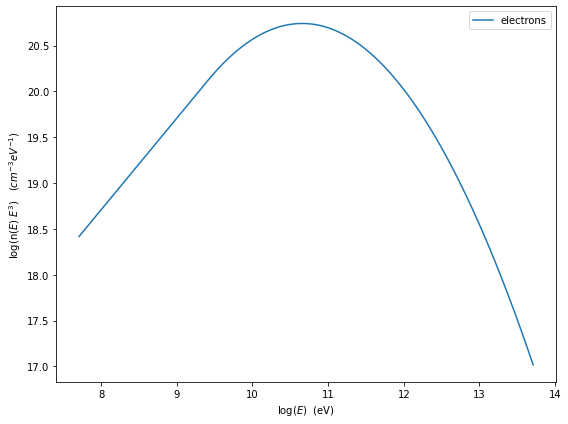

In [11]:
p=my_jet.electron_distribution.plot3p(energy_unit='eV')

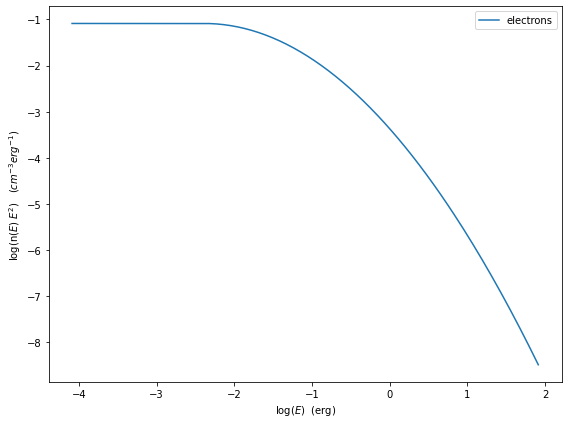

In [12]:
p=my_jet.electron_distribution.plot2p(energy_unit='erg')

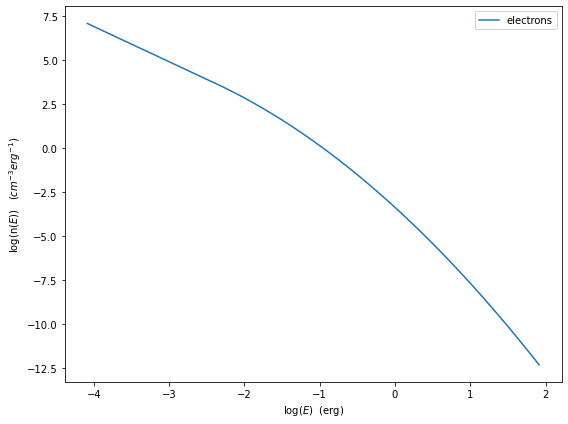

In [13]:
p=my_jet.electron_distribution.plot(energy_unit='erg')

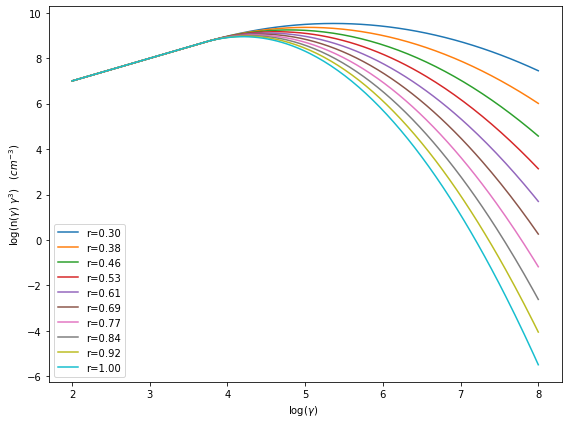

In [14]:
import numpy as np
p=None
for r in np.linspace(0.3,1,10):
    my_jet.parameters.r.val=r
    _l='r=%2.2f'%r
    if p is None:
        p=my_jet.electron_distribution.plot3p(label=_l)
    else:
        p=my_jet.electron_distribution.plot3p(p,label=_l)

###  Using log values for electron distribution parameters

In [15]:
my_jet=Jet(name='test',electron_distribution='lppl',electron_distribution_log_values=True)
my_jet.show_model()


--------------------------------------------------------------------------------
jet model description
--------------------------------------------------------------------------------
name: test  

electrons distribution:
 type: lppl  
 gamma energy grid size:  201
 gmin grid : 2.000000e+00
 gmax grid : 1.000000e+06
 normalization  True
 log-values  True

radiative fields:
 seed photons grid size:  100
 IC emission grid size:  100
 source emissivity lower bound :  1.000000e-120
 spectral components:
   name:Sum, state: on
   name:Sync, state: self-abs
   name:SSC, state: on
external fields transformation method: blob

SED info:
 nu grid size jetkernel: 1000
 nu grid size: 500
 nu mix (Hz): 1.000000e+06
 nu max (Hz): 1.000000e+30

flux plot lower bound   :  1.000000e-120

--------------------------------------------------------------------------------


model name,name,par type,units,val,phys. bound. min,phys. bound. max,log,frozen
test,R,region_size,cm,5.000000e+15,1.000000e+03,1.000000e+30,False,False
test,R_H,region_position,cm,1.000000e+17,0.000000e+00,--,False,True
test,B,magnetic_field,gauss,1.000000e-01,0.000000e+00,--,False,False
test,beam_obj,beaming,lorentz-factor*,1.000000e+01,1.000000e-04,--,False,False
test,z_cosm,redshift,,1.000000e-01,0.000000e+00,--,False,False
test,gmin,low-energy-cut-off,lorentz-factor*,3.010300e-01,0.000000e+00,9.000000e+00,True,False
test,gmax,high-energy-cut-off,lorentz-factor*,6.000000e+00,0.000000e+00,1.500000e+01,True,False
test,N,emitters_density,1 / cm3,1.000000e+02,0.000000e+00,--,False,False
test,gamma0_log_parab,turn-over-energy,lorentz-factor*,4.000000e+00,0.000000e+00,9.000000e+00,True,False
test,s,LE_spectral_slope,,2.000000e+00,-1.000000e+01,1.000000e+01,False,False


--------------------------------------------------------------------------------


## Evaluate and plot  the model


At this point we can evaluate the  emission for this jet model using the instruction

In [16]:
my_jet.eval()

In [17]:
my_jet.show_pars()

model name,name,par type,units,val,phys. bound. min,phys. bound. max,log,frozen
test,R,region_size,cm,5.000000e+15,1.000000e+03,1.000000e+30,False,False
test,R_H,region_position,cm,1.000000e+17,0.000000e+00,--,False,True
test,B,magnetic_field,gauss,1.000000e-01,0.000000e+00,--,False,False
test,beam_obj,beaming,lorentz-factor*,1.000000e+01,1.000000e-04,--,False,False
test,z_cosm,redshift,,1.000000e-01,0.000000e+00,--,False,False
test,gmin,low-energy-cut-off,lorentz-factor*,3.010300e-01,0.000000e+00,9.000000e+00,True,False
test,gmax,high-energy-cut-off,lorentz-factor*,6.000000e+00,0.000000e+00,1.500000e+01,True,False
test,N,emitters_density,1 / cm3,1.000000e+02,0.000000e+00,--,False,False
test,gamma0_log_parab,turn-over-energy,lorentz-factor*,4.000000e+00,0.000000e+00,9.000000e+00,True,False
test,s,LE_spectral_slope,,2.000000e+00,-1.000000e+01,1.000000e+01,False,False


and plot the corresponding SED:


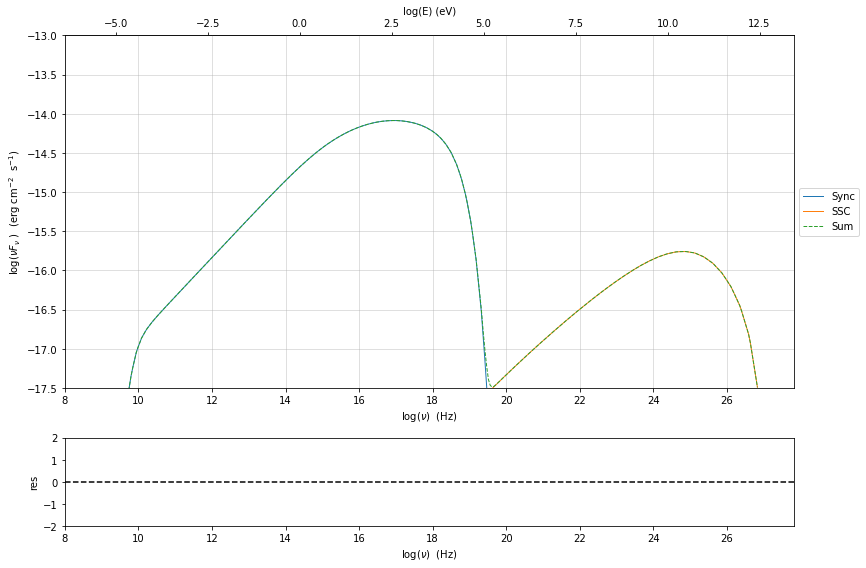

In [18]:
from jetset.plot_sedfit import PlotSED
my_plot=PlotSED()
my_jet.plot_model(plot_obj=my_plot)
my_plot.rescale(y_max=-13,y_min=-17.5,x_min=8)

alternatively, you can call the ``plot_model`` method without passing a ``Plot`` object

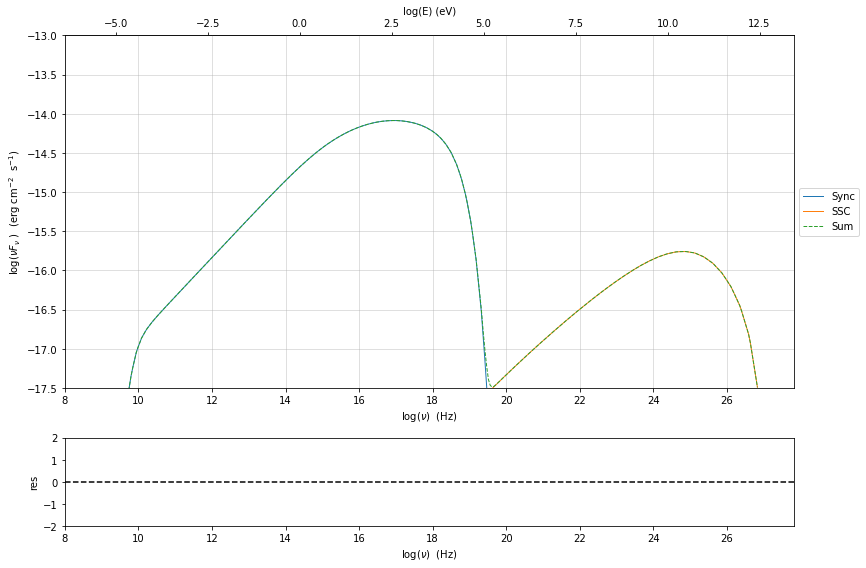

In [19]:
my_plot=my_jet.plot_model()
my_plot.rescale(y_max=-13,y_min=-17.5,x_min=8)

In [20]:
my_jet.set_IC_nu_size(100)

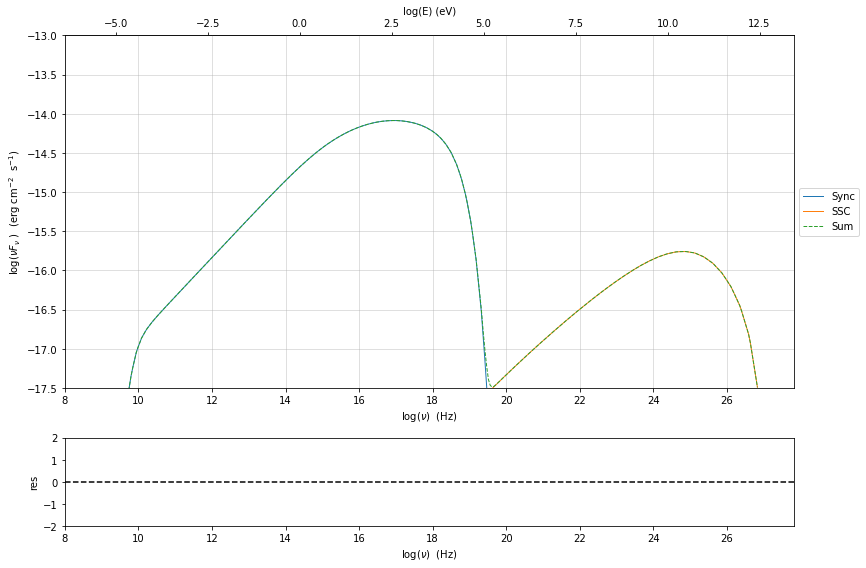

In [21]:
my_jet.eval()
my_plot=my_jet.plot_model()
my_plot.rescale(y_max=-13,y_min=-17.5,x_min=8)

you can access the same plot, but in the rest frame of the black hole, or accretion disk, hence plotting the isotropic luminosity,
by simply passing the ``frame`` kw to ``src``

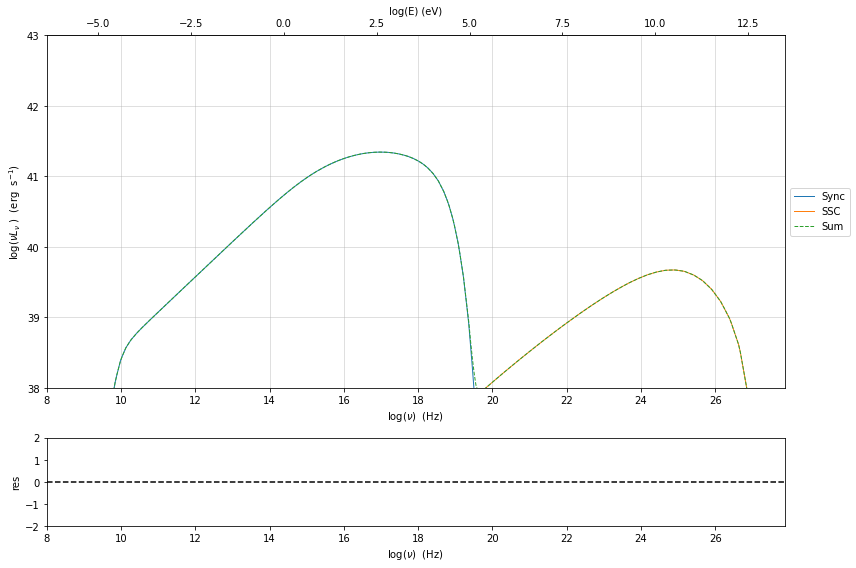

In [22]:
my_plot=my_jet.plot_model(frame='src')
my_plot.rescale(y_max=43,y_min=38,x_min=8)

the ``my_plot`` object returned will be built on the fly by the  ``plot_model`` method

Starting from version 1.2.0 you can also plot in the `Fnu` or `Lnu` representation adding the `density=True` keyword to the `plot_model command`

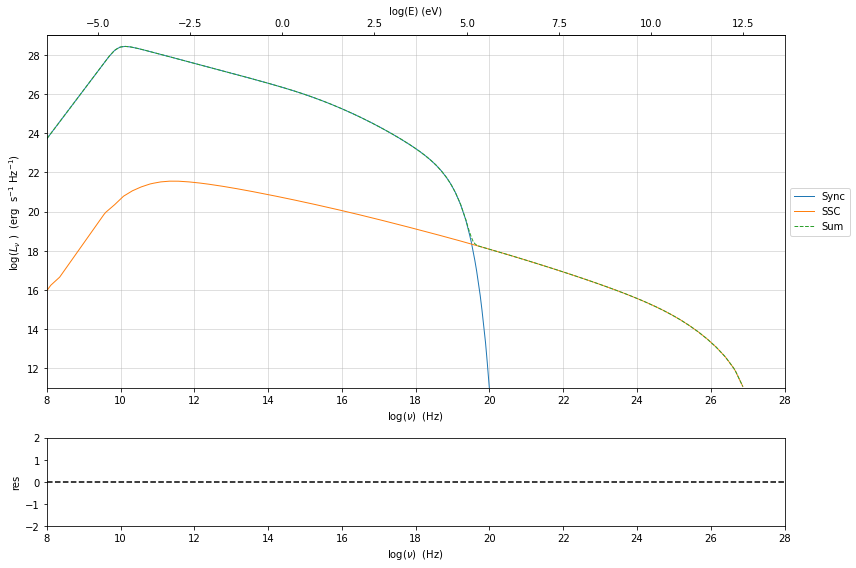

In [23]:
my_plot=my_jet.plot_model(frame='src',density=True)
my_plot.rescale(y_max=29,y_min=11,x_min=8,x_max=28)

## Comparing models on the same plot

to compare the same model after changing a parameter

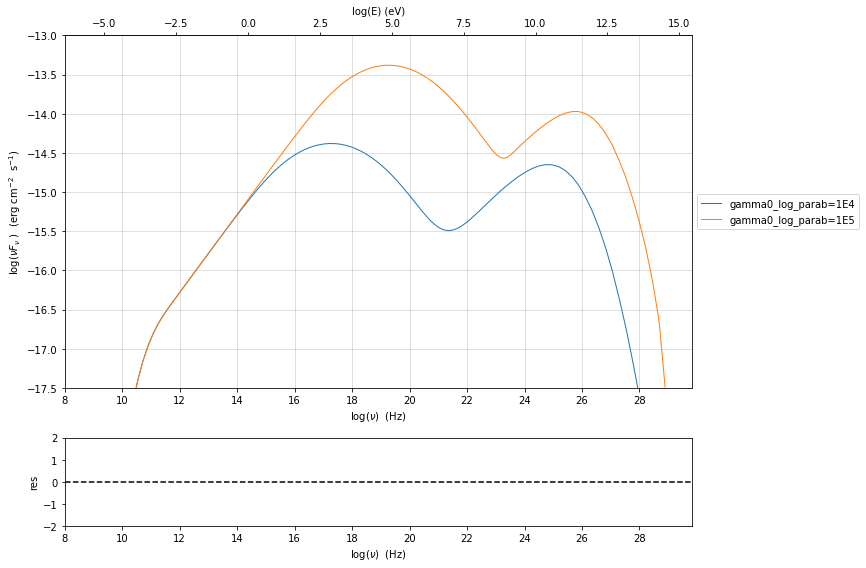

In [24]:
my_jet=Jet(name='test',electron_distribution='lppl',)
my_jet.set_par('B',val=0.2)
my_jet.set_par('gamma0_log_parab',val=5E3)
my_jet.set_par('gmin',val=1E2)
my_jet.set_par('gmax',val=1E8)
my_jet.set_par('R',val=10**14.5)
my_jet.set_par('N',val=1E3)

my_jet.parameters.gamma0_log_parab.val=1E4
my_jet.eval()
my_plot=my_jet.plot_model(label='gamma0_log_parab=1E4',comp='Sum')
my_jet.set_par('gamma0_log_parab',val=1.0E5)
my_jet.eval()
my_plot=my_jet.plot_model(my_plot,label='gamma0_log_parab=1E5',comp='Sum')
my_plot.rescale(y_max=-13,y_min=-17.5,x_min=8)

## Saving a plot

to save the plot

In [25]:
my_plot.save('jet1.png')

## Saving and loading  a model

In [26]:
my_jet.save_model('test_model.pkl')

In [27]:
my_jet_new=Jet.load_model('test_model.pkl')

model name,name,par type,units,val,phys. bound. min,phys. bound. max,log,frozen
test,gmin,low-energy-cut-off,lorentz-factor*,1.000000e+02,1.000000e+00,1.000000e+09,False,False
test,gmax,high-energy-cut-off,lorentz-factor*,1.000000e+08,1.000000e+00,1.000000e+15,False,False
test,N,emitters_density,1 / cm3,1.000000e+03,0.000000e+00,--,False,False
test,gamma0_log_parab,turn-over-energy,lorentz-factor*,1.000000e+05,1.000000e+00,1.000000e+09,False,False
test,s,LE_spectral_slope,,2.000000e+00,-1.000000e+01,1.000000e+01,False,False
test,r,spectral_curvature,,4.000000e-01,-1.500000e+01,1.500000e+01,False,False
test,R,region_size,cm,3.162278e+14,1.000000e+03,1.000000e+30,False,False
test,R_H,region_position,cm,1.000000e+17,0.000000e+00,--,False,True
test,B,magnetic_field,gauss,2.000000e-01,0.000000e+00,--,False,False
test,beam_obj,beaming,lorentz-factor*,1.000000e+01,1.000000e-04,--,False,False


## Switching on/off the particle distribution normalization

In [28]:
my_jet.Norm_distr

True

and then you can switch off the normalization withe command

In [29]:
my_jet.switch_Norm_distr_OFF()

OR

In [30]:
my_jet.Norm_distr=0

In [31]:
my_jet.switch_Norm_distr_ON()

OR

In [32]:
my_jet.Norm_distr=1

## Setting the particle density  from observed Fluxes or Luminosities

In [33]:
my_jet=Jet(name='test',electron_distribution='lppl')

this is the initial value of N

In [34]:
my_jet.parameters.N.val

100.0

In [35]:

my_jet.set_N_from_nuFnu(nuFnu_obs=1E-14,nu_obs=1E15)

This is the updated value of ``N``, obtained in order to match the given flux at the given frequency

In [36]:
my_jet.get_par_by_name('N').val

272.37555111028803

OR

In [37]:
my_jet.parameters.N.val

272.37555111028803

In [38]:
my_jet.parameters.show_pars()

model name,name,par type,units,val,phys. bound. min,phys. bound. max,log,frozen
test,R,region_size,cm,5.000000e+15,1.000000e+03,1.000000e+30,False,False
test,R_H,region_position,cm,1.000000e+17,0.000000e+00,--,False,True
test,B,magnetic_field,gauss,1.000000e-01,0.000000e+00,--,False,False
test,beam_obj,beaming,lorentz-factor*,1.000000e+01,1.000000e-04,--,False,False
test,z_cosm,redshift,,1.000000e-01,0.000000e+00,--,False,False
test,gmin,low-energy-cut-off,lorentz-factor*,2.000000e+00,1.000000e+00,1.000000e+09,False,False
test,gmax,high-energy-cut-off,lorentz-factor*,1.000000e+06,1.000000e+00,1.000000e+15,False,False
test,N,emitters_density,1 / cm3,2.723756e+02,0.000000e+00,--,False,False
test,gamma0_log_parab,turn-over-energy,lorentz-factor*,1.000000e+04,1.000000e+00,1.000000e+09,False,False
test,s,LE_spectral_slope,,2.000000e+00,-1.000000e+01,1.000000e+01,False,False


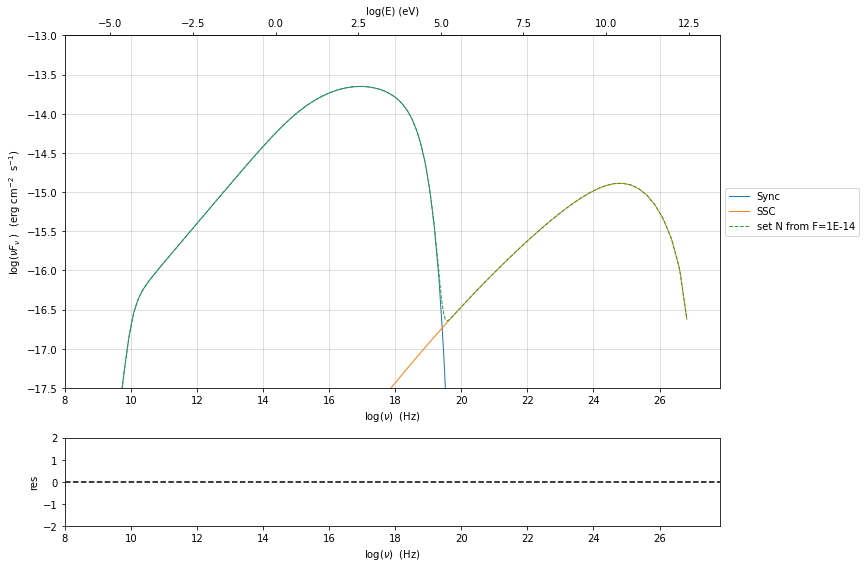

In [39]:
my_jet.eval()
my_plot=my_jet.plot_model(label='set N from F=1E-14')
my_plot.rescale(y_max=-13,y_min=-17.5,x_min=8)

In [40]:
my_jet.set_N_from_nuLnu(nuLnu_src=1E43,nu_src=1E15)

## Setting the beaming factor and expression

In [41]:
my_jet=Jet(name='test',electron_distribution='lppl',beaming_expr='bulk_theta')

In [42]:
my_jet.parameters.show_pars()

model name,name,par type,units,val,phys. bound. min,phys. bound. max,log,frozen
test,R,region_size,cm,5.000000e+15,1.000000e+03,1.000000e+30,False,False
test,R_H,region_position,cm,1.000000e+17,0.000000e+00,--,False,True
test,B,magnetic_field,gauss,1.000000e-01,0.000000e+00,--,False,False
test,theta,jet-viewing-angle,deg,1.000000e-01,0.000000e+00,--,False,False
test,BulkFactor,jet-bulk-factor,lorentz-factor*,1.000000e+01,1.000000e+00,--,False,False
test,z_cosm,redshift,,1.000000e-01,0.000000e+00,--,False,False
test,gmin,low-energy-cut-off,lorentz-factor*,2.000000e+00,1.000000e+00,1.000000e+09,False,False
test,gmax,high-energy-cut-off,lorentz-factor*,1.000000e+06,1.000000e+00,1.000000e+15,False,False
test,N,emitters_density,1 / cm3,1.000000e+02,0.000000e+00,--,False,False
test,gamma0_log_parab,turn-over-energy,lorentz-factor*,1.000000e+04,1.000000e+00,1.000000e+09,False,False


In [43]:
my_jet.get_beaming()

19.943844732554165

In [44]:
my_jet.set_par('theta',val=10.)

In [45]:
my_jet.get_beaming()

4.968041140891955

of course setting `beaming_expr=delta` we get the same beaming expression as in the default case

In [46]:
my_jet=Jet(name='test',electron_distribution='lppl',beaming_expr='delta')

In [47]:
my_jet.parameters.show_pars()

model name,name,par type,units,val,phys. bound. min,phys. bound. max,log,frozen
test,R,region_size,cm,5.000000e+15,1.000000e+03,1.000000e+30,False,False
test,R_H,region_position,cm,1.000000e+17,0.000000e+00,--,False,True
test,B,magnetic_field,gauss,1.000000e-01,0.000000e+00,--,False,False
test,beam_obj,beaming,lorentz-factor*,1.000000e+01,1.000000e-04,--,False,False
test,z_cosm,redshift,,1.000000e-01,0.000000e+00,--,False,False
test,gmin,low-energy-cut-off,lorentz-factor*,2.000000e+00,1.000000e+00,1.000000e+09,False,False
test,gmax,high-energy-cut-off,lorentz-factor*,1.000000e+06,1.000000e+00,1.000000e+15,False,False
test,N,emitters_density,1 / cm3,1.000000e+02,0.000000e+00,--,False,False
test,gamma0_log_parab,turn-over-energy,lorentz-factor*,1.000000e+04,1.000000e+00,1.000000e+09,False,False
test,s,LE_spectral_slope,,2.000000e+00,-1.000000e+01,1.000000e+01,False,False


## Switch ON/OFF Synchrotron sefl-absorption and IC emission

In [48]:
my_jet.show_model()


--------------------------------------------------------------------------------
jet model description
--------------------------------------------------------------------------------
name: test  

electrons distribution:
 type: lppl  
 gamma energy grid size:  201
 gmin grid : 2.000000e+00
 gmax grid : 1.000000e+06
 normalization  True
 log-values  False

radiative fields:
 seed photons grid size:  100
 IC emission grid size:  100
 source emissivity lower bound :  1.000000e-120
 spectral components:
   name:Sum, state: on
   name:Sync, state: self-abs
   name:SSC, state: on
external fields transformation method: blob

SED info:
 nu grid size jetkernel: 1000
 nu grid size: 500
 nu mix (Hz): 1.000000e+06
 nu max (Hz): 1.000000e+30

flux plot lower bound   :  1.000000e-120

--------------------------------------------------------------------------------


model name,name,par type,units,val,phys. bound. min,phys. bound. max,log,frozen
test,R,region_size,cm,5.000000e+15,1.000000e+03,1.000000e+30,False,False
test,R_H,region_position,cm,1.000000e+17,0.000000e+00,--,False,True
test,B,magnetic_field,gauss,1.000000e-01,0.000000e+00,--,False,False
test,beam_obj,beaming,lorentz-factor*,1.000000e+01,1.000000e-04,--,False,False
test,z_cosm,redshift,,1.000000e-01,0.000000e+00,--,False,False
test,gmin,low-energy-cut-off,lorentz-factor*,2.000000e+00,1.000000e+00,1.000000e+09,False,False
test,gmax,high-energy-cut-off,lorentz-factor*,1.000000e+06,1.000000e+00,1.000000e+15,False,False
test,N,emitters_density,1 / cm3,1.000000e+02,0.000000e+00,--,False,False
test,gamma0_log_parab,turn-over-energy,lorentz-factor*,1.000000e+04,1.000000e+00,1.000000e+09,False,False
test,s,LE_spectral_slope,,2.000000e+00,-1.000000e+01,1.000000e+01,False,False


--------------------------------------------------------------------------------


as you see the state of Sync emission is `self-abs`, we can check accessing the specific spectral component state, and get the allowed states value

In [49]:
my_jet.spectral_components.Sync.show()

name                : Sync
var name            : do_Sync
state               : self-abs
allowed states : ['on', 'off', 'self-abs']


In [50]:
my_jet.spectral_components.Sync.state='on'

now the sate is 'on' with no 'self-abs' 

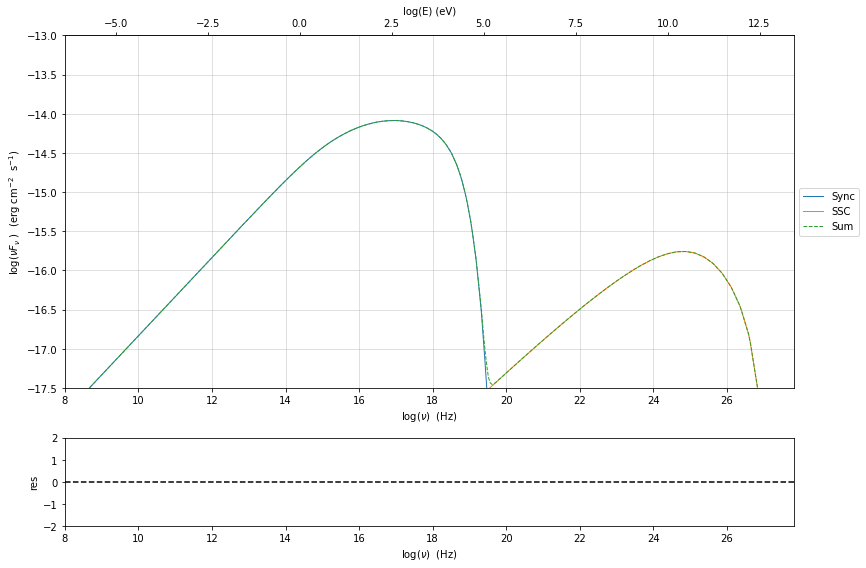

In [51]:
my_jet.eval()
p=my_jet.plot_model()
p.rescale(y_max=-13,y_min=-17.5,x_min=8)

to re-enable

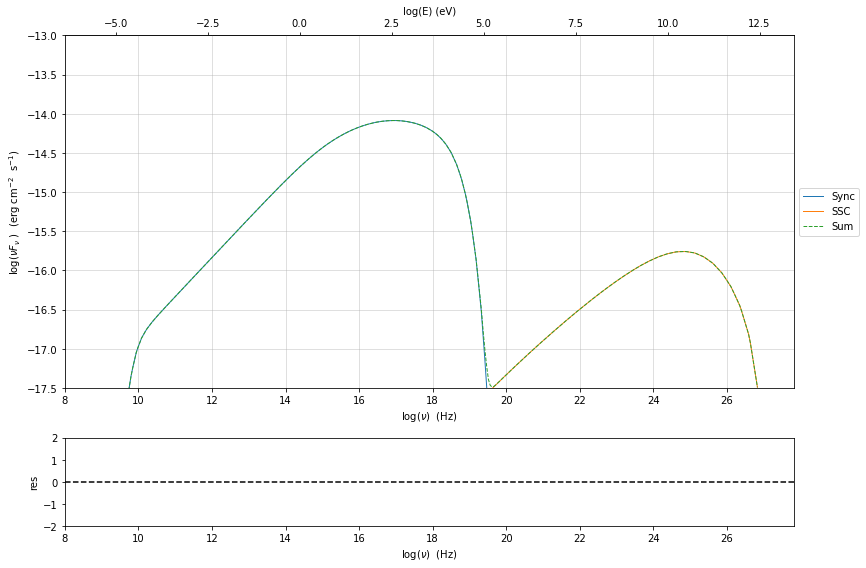

In [52]:
my_jet.spectral_components.Sync.state='self-abs'
my_jet.eval()
p=my_jet.plot_model()
p.rescale(y_max=-13,y_min=-17.5,x_min=8)

In [53]:
my_jet.spectral_components.SSC.show()

name                : SSC
var name            : do_SSC
state               : on
allowed states : ['on', 'off']


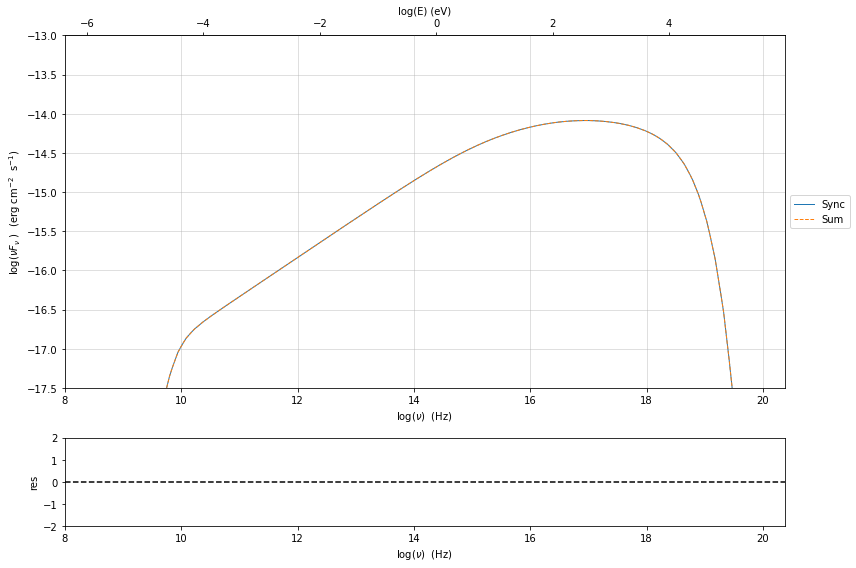

In [54]:
my_jet.spectral_components.SSC.state='off'
my_jet.eval()
p=my_jet.plot_model()
p.rescale(y_max=-13,y_min=-17.5,x_min=8)

to re-enable

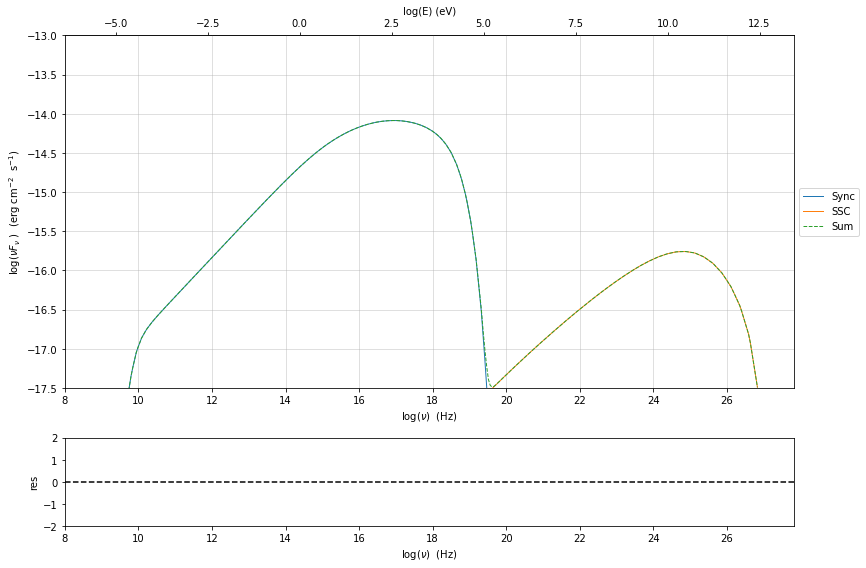

In [55]:
my_jet.spectral_components.SSC.state='on'
my_jet.eval()
p=my_jet.plot_model()
p.rescale(y_max=-13,y_min=-17.5,x_min=8)

## Accessing individual spectral components

It is possible to access specific spectral components of our model

In [56]:
my_jet=Jet(name='test',electron_distribution='lppl',beaming_expr='bulk_theta')
my_jet.eval()

In [57]:

my_jet.list_spectral_components()

Sum
Sync
SSC


the on-screen message is telling us which components have been evaluated. 

In [58]:
Sync=my_jet.get_spectral_component_by_name('Sync')

OR

In [59]:
Sync=my_jet.spectral_components.Sync

and from the ``SED`` object we can extract both the nu and nuFnu array

In [60]:
nu_sync=Sync.SED.nu
nuFnu_sync=Sync.SED.nuFnu

In [61]:
print (nuFnu_sync[::10])

[0.00000000e+00 0.00000000e+00 0.00000000e+00 6.04250670e-26
 2.16351829e-24 9.84432972e-23 4.74613296e-21 2.28931297e-19
 1.09662087e-17 1.83733916e-16 4.11135769e-16 7.21745036e-16
 1.25581697e-15 2.18363181e-15 3.79383567e-15 6.57833387e-15
 1.13501032e-14 1.93585563e-14 3.21429895e-14 5.06938061e-14
 7.36908738e-14 9.77112603e-14 1.17645633e-13 1.28621805e-13
 1.26850509e-13 1.10646286e-13 7.82537850e-14 3.17631756e-14
 2.39710785e-15 8.88519981e-19 7.47780581e-29 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00] erg / (cm2 s)


In [62]:
nu_sync_src=Sync.SED.nu_src
nuLnu_sync_src=Sync.SED.nuLnu_src

In [63]:
print (nuLnu_sync_src[::10])

[0.00000000e+00 0.00000000e+00 0.00000000e+00 1.63219228e+30
 5.84406112e+31 2.65913465e+33 1.28201787e+35 6.18385569e+36
 2.96217481e+38 4.96299126e+39 1.11055338e+40 1.94956618e+40
 3.39219277e+40 5.89839143e+40 1.02478484e+41 1.77692906e+41
 3.06587177e+41 5.22910236e+41 8.68241307e+41 1.36933301e+42
 1.99052613e+42 2.63936099e+42 3.17782509e+42 3.47431170e+42
 3.42646573e+42 2.98875984e+42 2.11377876e+42 8.57981835e+41
 6.47502951e+40 2.40005601e+37 2.01989298e+27 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00] erg / s


In [64]:
my_jet.spectral_components.build_table(restframe='obs')
t_obs=my_jet.spectral_components.table

In [65]:
t_obs[::10]

nu,Sum,Sync,SSC
Hz,erg / (cm2 s),erg / (cm2 s),erg / (cm2 s)
float64,float64,float64,float64
1000000.0,0.0,0.0,0.0
3026648.059395689,0.0,0.0,0.0
9160598.47544371,0.0,0.0,0.0
27725907.59860481,6.042506698961876e-26,6.042506698961876e-26,0.0
83916564.42830162,2.1635183262103024e-24,2.1635182921864927e-24,3.4023433519560716e-32
253985906.87807292,9.844329885880581e-23,9.844329720868366e-23,1.6498676086277722e-30
768725952.1663721,4.7461330192800106e-21,4.746132957910235e-21,6.136928342027515e-29
2326662911.331458,2.289313003537184e-19,2.289312967845199e-19,3.569167611890846e-27


In [66]:
my_jet.spectral_components.build_table(restframe='src')
t_src=my_jet.spectral_components.table

In [67]:
t_src[::10]

nu,Sum,Sync,SSC
Hz,erg / s,erg / s,erg / s
float64,float64,float64,float64
1100000.0,0.0,0.0,0.0
3329312.865335258,0.0,0.0,0.0
10076658.322988082,0.0,0.0,0.0
30498498.35846529,1.6321922754264707e+30,1.6321922754264707e+30,0.0
92308220.8711318,5.844061207893652e+31,5.84406111598908e+31,9.190355615766844e+23
279384497.56588024,2.659134693097609e+33,2.659134648524772e+33,4.456596079142524e+25
845598547.3830093,1.2820178839927871e+35,1.2820178674156813e+35,1.6576972991066742e+27
2559329202.464604,6.183855784634422e+36,6.183855688223801e+36,9.64097864687752e+28


Of cousrse, since these colums have units, you can easily convert the units of the Synchrotron luminostity form erg/s to GeV/s

In [68]:
t_src['Sync'][::10].to('GeV/s')

<Quantity [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 1.01873429e+33,
           3.64757605e+34, 1.65970130e+36, 8.00172615e+37, 3.85965914e+39,
           1.84884409e+41, 3.09765550e+42, 6.93152902e+42, 1.21682350e+43,
           2.11724020e+43, 3.68148636e+43, 6.39620389e+43, 1.10907188e+44,
           1.91356665e+44, 3.26374898e+44, 5.41913600e+44, 8.54670440e+44,
           1.24238869e+45, 1.64735955e+45, 1.98344242e+45, 2.16849480e+45,
           2.13863170e+45, 1.86543717e+45, 1.31931693e+45, 5.35510141e+44,
           4.04139555e+43, 1.49799713e+40, 1.26071804e+30, 0.00000000e+00,
           0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
           0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
           0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
           0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
           0.00000000e+00, 0.00000000e+00] GeV / s>

the table can be easily saved as an ascii file

In [69]:
t_src.write('test_SED.txt',format='ascii.ecsv',overwrite=True)

or in fits format

In [70]:
t_src.write('test_SED.fits',format='fits',overwrite=True)

## Energetic report

It is possible to get an energetic report of the jet model (updated each time that you evaluate the model).
This report gives energy densities (`U_`) (both in the blob end disk restframe), the luminosities of the emitted
components in the blob restframe (`L_`), and the luminosity carried by the jet (`jet_L`) for the radiative 
components, the electrons, the magnetic fields, and for the cold protons in the jet.

In [71]:
my_jet.energetic_report()

name,type,units,val
U_e,Energy dens. blob rest. frame,erg / cm3,1.736635e-03
U_p_cold,Energy dens. blob rest. frame,erg / cm3,0.000000e+00
U_B,Energy dens. blob rest. frame,erg / cm3,3.978874e-04
U_p,Energy dens. blob rest. frame,erg / cm3,0.000000e+00
U_p_target,Energy dens. blob rest. frame,erg / cm3,0.000000e+00
U_Synch,Energy dens. blob rest. frame,erg / cm3,5.494838e-05
U_Synch_DRF,Energy dens. disk rest. frame,erg / cm3,8.693415e+00
U_Disk,Energy dens. blob rest. frame,erg / cm3,0.000000e+00
U_BLR,Energy dens. blob rest. frame,erg / cm3,0.000000e+00
U_DT,Energy dens. blob rest. frame,erg / cm3,0.000000e+00


If you want to evaluate the energetic report in non verbose mode:

In [72]:
my_jet.energetic_report(verbose=False)

In [73]:
my_jet.energetic_dict

{'U_e': 0.001736634756190472,
 'U_p_cold': 0.0,
 'U_B': 0.00039788735772973844,
 'U_p': 0.0,
 'U_p_target': 0.0,
 'U_Synch': 5.4948380795748906e-05,
 'U_Synch_DRF': 8.693415496816337,
 'U_Disk': 0.0,
 'U_BLR': 0.0,
 'U_DT': 0.0,
 'U_CMB': 0.0,
 'U_Disk_DRF': 0.0,
 'U_BLR_DRF': 0.0,
 'U_DT_DRF': 0.0,
 'U_CMB_DRF': 0.0,
 'L_Sync_rf': 1.7250177084192923e+38,
 'L_SSC_rf': 3.362216361563782e+36,
 'L_EC_Disk_rf': 0.0,
 'L_EC_BLR_rf': 0.0,
 'L_EC_DT_rf': 0.0,
 'L_EC_CMB_rf': 0.0,
 'L_pp_gamma_rf': 0.0,
 'jet_L_Sync': 4.3125442710482305e+39,
 'jet_L_SSC': 8.405540903909454e+37,
 'jet_L_EC_Disk': 0.0,
 'jet_L_EC_BLR': 0.0,
 'jet_L_EC_DT': 0.0,
 'jet_L_EC_CMB': 0.0,
 'jet_L_pp_gamma': 0.0,
 'jet_L_rad': 4.396599680087325e+39,
 'jet_L_kin': 4.068522013146244e+41,
 'jet_L_tot': 5.0446434144762236e+41,
 'jet_L_e': 4.068522013146244e+41,
 'jet_L_B': 9.321554045291063e+40,
 'jet_L_p_cold': 0.0,
 'jet_L_p': 0.0}

In [74]:
my_jet.energetic_report_table

name,type,units,val
str17,str29,object,float64
U_e,Energy dens. blob rest. frame,erg / cm3,1.736635e-03
U_p_cold,Energy dens. blob rest. frame,erg / cm3,0.000000e+00
U_B,Energy dens. blob rest. frame,erg / cm3,3.978874e-04
U_p,Energy dens. blob rest. frame,erg / cm3,0.000000e+00
U_p_target,Energy dens. blob rest. frame,erg / cm3,0.000000e+00
U_Synch,Energy dens. blob rest. frame,erg / cm3,5.494838e-05
U_Synch_DRF,Energy dens. disk rest. frame,erg / cm3,8.693415e+00
U_Disk,Energy dens. blob rest. frame,erg / cm3,0.000000e+00
U_BLR,Energy dens. blob rest. frame,erg / cm3,0.000000e+00
